# 混合モデルと近似推論
https://www.amazon.co.jp/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E3%82%B9%E3%82%BF%E3%83%BC%E3%83%88%E3%82%A2%E3%83%83%E3%83%97%E3%82%B7%E3%83%AA%E3%83%BC%E3%82%BA-%E3%83%99%E3%82%A4%E3%82%BA%E6%8E%A8%E8%AB%96%E3%81%AB%E3%82%88%E3%82%8B%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E5%85%A5%E9%96%80-KS%E6%83%85%E5%A0%B1%E7%A7%91%E5%AD%A6%E5%B0%82%E9%96%80%E6%9B%B8-%E9%A0%88%E5%B1%B1-%E6%95%A6%E5%BF%97/dp/4061538322/ref=pd_lpo_sccl_1/357-1883824-8378404?pd_rd_w=Ppwn7&content-id=amzn1.sym.d769922e-188a-40cc-a180-3315f856e8d6&pf_rd_p=d769922e-188a-40cc-a180-3315f856e8d6&pf_rd_r=FZTFK68376X7D0ZJN3CH&pd_rd_wg=26Ise&pd_rd_r=8eec0c7c-9e68-456c-977b-39077482792c&pd_rd_i=4061538322&psc=1

In [13]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# 簡単なサンプリング手法

## 棄却法
統計検定1級（理工学2022：問4）の問題を具体例にして，棄却法の説明をします．

### 問題の概要
パラメータが$4,3$であるベータ分布のサンプリングを行いたいという問題です．

ベータ分布は逆関数法からは簡単にはサンプリングできないため，簡単にサンプリング可能な一様分布からの変換を考えます．

このような簡単にサンプリングが行えて，実際にサンプリングをするときに手伝ってくれる分布のことを，教科書では総じて提案分布と呼んでいます．
### ベータ分布の形状
https://max999blog.com/python-beta-distribution-scipy/

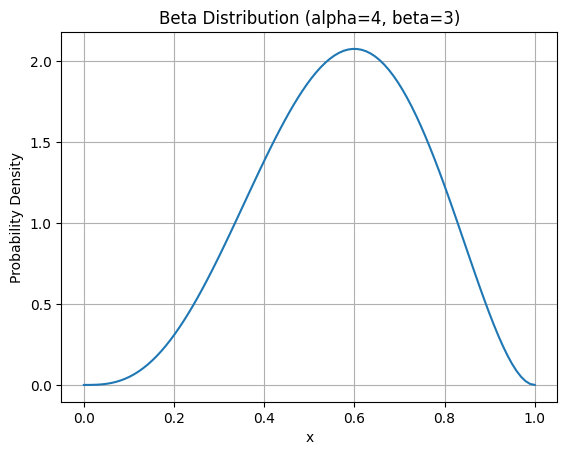

In [22]:
# パラメータ
alpha = 4
beta = 3

# ベータ分布を生成するためのパラメータ
beta_dist = stats.beta(alpha, beta)
ls = np.linspace(0, 1, 100)

# プロット
plt.plot(ls, beta_dist.pdf(ls)) # pdf : Probability density function.
plt.title('Beta Distribution (alpha=4, beta=3)')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

独立な一様分布$Y , U$を使って確率変数を次のように定義します．
$$
X = Y \ \ \ (c_0 U \leq f(Y)) \\
\ \ \ -1\ \ \ \ (otherwise)
$$
ただし，$f(Y) = \dfrac{Y^{a-1}(1-Y)^{b-1}}{B(a,b)}$であり，$B(a,b)$はベータ関数です．

また，$c_0$は$f(Y)$の最大値を表します．(問1)

そして，$Pr[(c_0 U \leq f(Y))] = \dfrac{1}{c_0}$ということがわかっています．(問2)

実際に，この確率変数$X$はベータ分布に従うことがわかります．(問3)

### 棄却法のアルゴリズム
1. 提案分布からサンプリングを行う．
2. $c_0 U \leq f(Y)$を満たすかどうかを判定する．
3. 満たさない場合は，1に戻る．
4. 満たす場合は，$X = Y$として，$X$を採用する．
5. 1に戻る．   

1つのサンプルを得るためには，期待値的に$2c_0$個の一様乱数を発生させる必要があります．（問4）

In [25]:
c0 = beta_dist.pdf(0.6)

In [29]:
# お試し実装
u = np.random.uniform(0, 1)
y = np.random.uniform(0, 1)

left = c0 * u
right = beta_dist.pdf(y)

if c0 * u <= beta_dist.pdf(y):
    print(left)
    print(right)
    print('Accept')
else:
    print(left)
    print(right)
    print('Reject')

0.6327769955365783
1.9349979229299041
Accept


In [31]:
# 5回だけ回す
samples = []
for i in range(5):
    u = np.random.uniform(0, 1)
    y = np.random.uniform(0, 1)
    left = c0 * u
    right = beta_dist.pdf(y)
    if c0 * u <= beta_dist.pdf(y):
        samples.append(y)

print(samples)

[0.8006467943403553, 0.6879726691076878, 0.5028089454318988]


いい感じなので関数を定義して，サンプリングをしてみます．

In [32]:
# 関数として定義
def rejection_sampling(c0 , n_samples=1000):
    samples = []
    for i in range(n_samples):
        u = np.random.uniform(0, 1)
        y = np.random.uniform(0, 1)
        left = c0 * u
        right = beta_dist.pdf(y)
        if c0 * u <= beta_dist.pdf(y):
            samples.append(y)
    return samples

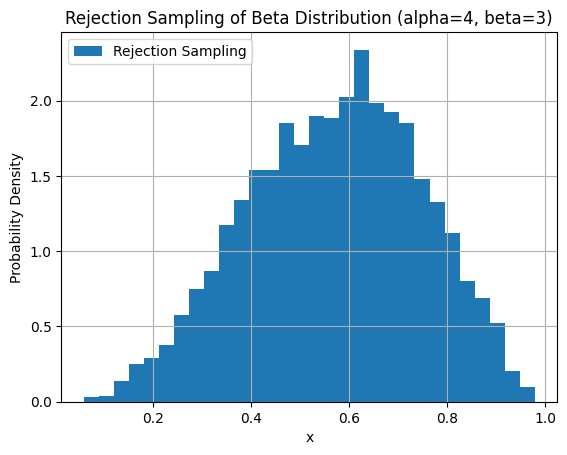

In [34]:
# サンプル数
n_samples = 10000

# 棄却サンプリングの実行
samples = rejection_sampling(c0 , n_samples)

# ヒストグラムのプロット
plt.hist(samples, bins=30, density=True, label='Rejection Sampling')
plt.title('Rejection Sampling of Beta Distribution (alpha=4, beta=3)')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

採択される確率は$c_0^{-1}$であったので，確かめてみます．

In [37]:
1/c0 * n_samples

4822.530864197535

In [35]:
len(samples)

4755